In [29]:
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

In [6]:
digits = load_digits()

In [20]:
data, target = digits['data'], digits['target']

In [19]:
np.unique(target)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [26]:
target_masks = []

for t in np.unique(target):
    target_masks.append(np.where(target==t)[0])

In [31]:
tsne = TSNE(n_components=2)

In [32]:
reduced = tsne.fit_transform(data)

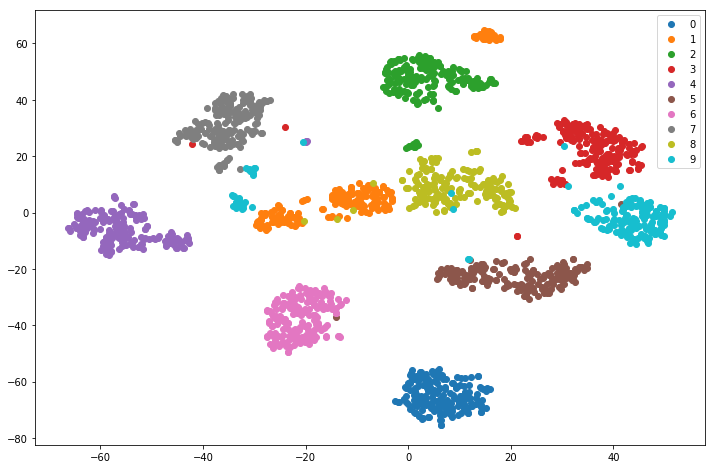

In [36]:
plt.figure(figsize=(12, 8))

for i, idx in enumerate(target_masks):
    plt.scatter(reduced[idx, 0], reduced[idx, 1], label=f'{i}')

plt.legend()

In [41]:
from sklearn.svm import SVC
from sklearn import metrics

In [56]:
svm = SVC(probability=True)

In [ ]:
svm.fit(data, target)

In [117]:
svm

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [58]:
sum(svm.predict(data) != target)

0

In [59]:
metrics.accuracy_score(target, svm.predict(data))

1.0

(array([35.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  3.,  0.,  0.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,  2.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,  2.,  0.,
         0.,  5.,  0.,  0.,  1.,  0.,  0.,  3.,  0.,  0.,  5.]),
 array([ 0.  ,  0.32,  0.64,  0.96,  1.28,  1.6 ,  1.92,  2.24,  2.56,
         2.88,  3.2 ,  3.52,  3.84,  4.16,  4.48,  4.8 ,  5.12,  5.44,
         5.76,  6.08,  6.4 ,  6.72,  7.04,  7.36,  7.68,  8.  ,  8.32,
         8.64,  8.96,  9.28,  9.6 ,  9.92, 10.24, 10.56, 10.88, 11.2 ,
        11.52, 11.84, 12.16, 12.48, 12.8 , 13.12, 13.44, 13.76, 14.08,
        14.4 , 14.72, 15.04, 15.36, 15.68, 16.  ]),
 <a list of 50 Patch objects>)

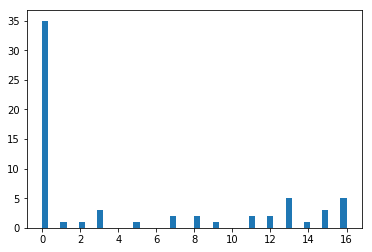

In [53]:
plt.hist(data[target_masks[6]][0], bins=50)

In [61]:
data[target_masks[6]][0].reshape(8, 8)

array([[ 0.,  0.,  0., 12., 13.,  0.,  0.,  0.],
       [ 0.,  0.,  5., 16.,  8.,  0.,  0.,  0.],
       [ 0.,  0., 13., 16.,  3.,  0.,  0.,  0.],
       [ 0.,  0., 14., 13.,  0.,  0.,  0.,  0.],
       [ 0.,  0., 15., 12.,  7.,  2.,  0.,  0.],
       [ 0.,  0., 13., 16., 13., 16.,  3.,  0.],
       [ 0.,  0.,  7., 16., 11., 15.,  8.,  0.],
       [ 0.,  0.,  1.,  9., 15., 11.,  3.,  0.]])

In [67]:
svm.predict_proba(data[target_masks[6]][0].reshape(1, -1))

array([[4.10961067e-14, 6.06959747e-14, 9.42038905e-14, 9.38750487e-14,
        7.25610793e-14, 1.05960221e-13, 9.99999863e-01, 3.35842394e-08,
        4.91394813e-08, 5.40593747e-08]])

Text(0, 0.5, 'Predict Probability')

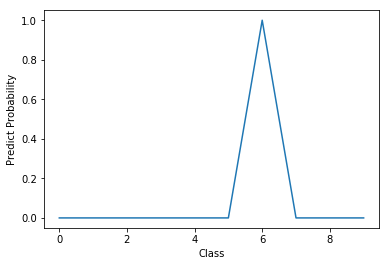

In [104]:
plt.plot(svm.predict_proba(data[target_masks[6]][0].reshape(1, -1))[0])
plt.xlabel('Class')
plt.ylabel('Predict Probability')

In [71]:
svm.predict_proba(data[target_masks[6]][0].reshape(1, -1))[0][6]

0.9999998632164363

In [78]:
adv_data = np.tile(data[target_masks[6]][0], (10000, 1))
adv_data += 0.1*np.max(adv_data)*np.random.randn(adv_data.shape[0], adv_data.shape[1])

In [79]:
adv_data

array([[ 0.78407739,  3.06064363,  0.80698718, ..., 12.37434055,
         4.69203323, -0.91885027],
       [ 1.17882086,  0.75953107,  0.4367196 , ..., 12.0960904 ,
         1.33600518, -1.60212379],
       [-2.19245382, -0.83065533,  0.68763217, ...,  9.32907169,
         1.63655442,  3.23987862],
       ...,
       [-1.10622327,  1.13800639, -0.11110407, ...,  9.40272813,
         0.74454241,  0.17561114],
       [-0.51447917,  0.31788311,  0.98356461, ..., 11.26079443,
         0.96915399,  0.79130422],
       [ 2.29117867, -0.01726943, -0.37597083, ..., 10.52111266,
         4.28386497, -0.07321944]])

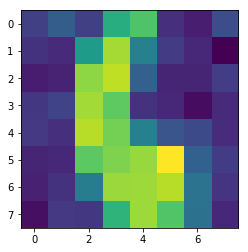

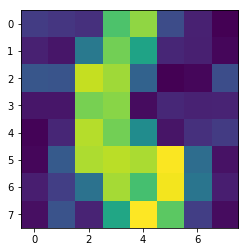

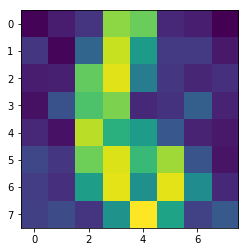

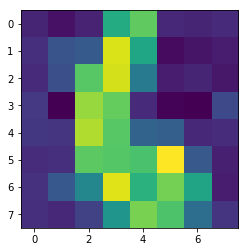

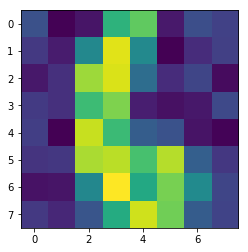

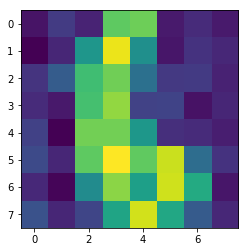

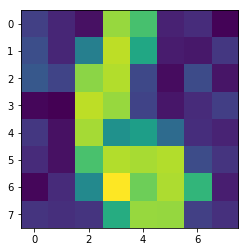

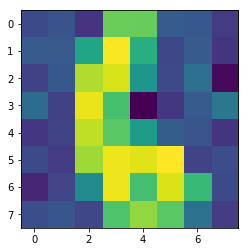

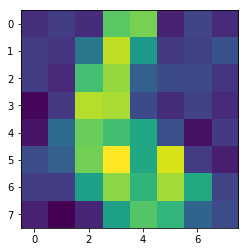

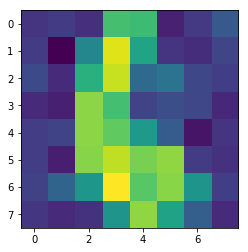

In [81]:
for ad in adv_data[:10]:
    plt.imshow(ad.reshape(8, 8))
    plt.show()

In [82]:
adv_probas = svm.predict_proba(adv_data)[]

In [84]:
adv_probas.shape

(10000, 10)

Text(0, 0.5, 'Frequency')

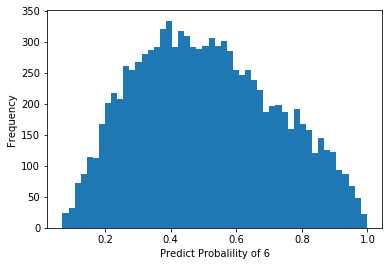

In [111]:
_ = plt.hist(adv_probas[:, 6], bins=50)
plt.xlabel('Predict Probalility of 6')
plt.ylabel('Frequency')

In [90]:
min_proba_idx = np.argmin(adv_probas[:, 6])

Org


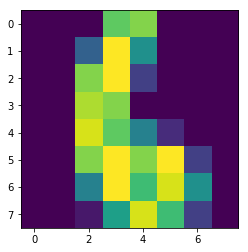

Adversarial Sample


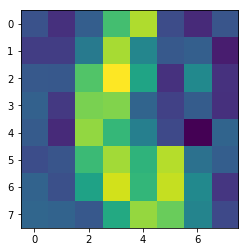

In [102]:
print('Org')
plt.imshow(data[target_masks[6]][0].reshape(8, 8))
plt.show()

print('Adversarial Sample')
plt.imshow(adv_data[min_proba_idx].reshape(8, 8))
plt.show()

Text(0, 0.5, 'Predict Probability')

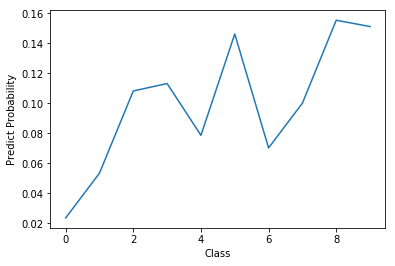

In [103]:
plt.plot(adv_probas[min_proba_idx, :])
plt.xlabel('Class')
plt.ylabel('Predict Probability')

In [93]:
reduced = tsne.fit_transform(np.vstack([data, adv_data[min_proba_idx].reshape(1, -1)]))

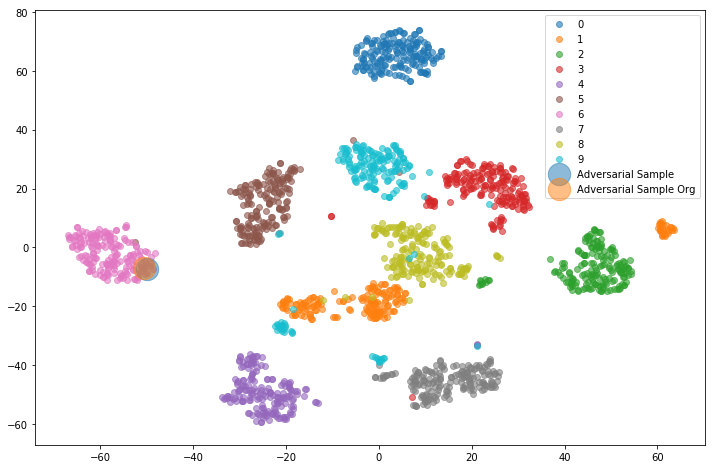

In [101]:
plt.figure(figsize=(12, 8))

for i, idx in enumerate(target_masks):
    plt.scatter(reduced[idx, 0], reduced[idx, 1], label=f'{i}', alpha=0.6)

plt.scatter(reduced[-1, 0], reduced[-1, 1], label='Adversarial Sample', s=500, alpha=0.5)
plt.scatter(reduced[target_masks[6][0], 0], reduced[target_masks[6][0], 1], label='Adversarial Sample Org', s=500, alpha=0.5)

plt.legend()

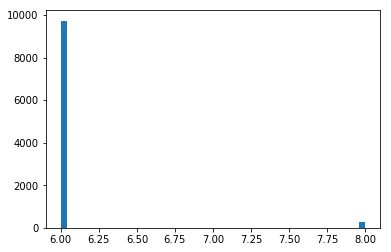

In [110]:
_ = plt.hist(np.argmax(adv_probas, axis=1), bins=50)